### La descente de gradient (GD) est un algorithme d'optimisation itératif utilisé pour trouver un minimum/maximum local d'une fonction donnée.

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

Vous avez vu dans le CM comment l'algorithme fonctionne. Dans ce TP, vous allez implémenter l'algorithme GD pour trouver le minimum de la fonction $(1/3)*(x-3)**2 - 5*np.sin(x) + 2*np.cos(x)$. Vous pouvez consulter le CM pour voir le code d'exemple.

On va écrire les fonctions :

*   **f_function** pour calculer la valeur de f 
*   **grad** pour calculer la dérivée
*   **gradient_descent** est la partie principale de l'implémentation de l'algorithme Gradient Desent. L'entrée de cette fonction est le taux d'apprentissage et le point de départ. L'algorithme s'arrête lorsque la dérivée est suffisamment petite

In [3]:
from math import sqrt

def f_function(x):
    return 1/3*(x-3)**2-5*np.sin(x)+2*np.cos(x)

def grad(x):
    return 1/3*2*(x-3)-5*np.sin(x)-2*np.cos(x)

def gradient_descent(eta, x0, max_iterations=1000, tolerance=1e-6):
    x = [x0]
    x_now = x0
    for it in range(max_iterations):
        x_new = x_now-eta*grad(x_now)
        if abs(f_function(x_now)-f_function(x_new)) < tolerance:
            break
        x.append(x_new)
        x_now = x_new
    return (x, it)

(x1, it1) = gradient_descent(eta=.1, x0=-2)
(x2, it2) = gradient_descent(eta=.1, x0=2)
print('Solution x1 = %f, f_valeur = %f, obtained after %d iterations' %(x1[-1], f_function(x1[-1]), it1))
print('Solution x2 = %f, f_valeur = %f, obtained after %d iterations' %(x2[-1], f_function(x2[-1]), it2))


Solution x1 = -2.732988, f_valeur = 11.107011, obtained after 24 iterations
Solution x2 = 2.787407, f_valeur = -3.594926, obtained after 16 iterations


### Nous pouvons visualiser le processus d'optimisation en utilisant la fonction **draw_gd1d** ci-dessous. 

/tmp/ipykernel_28250/1193870186.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_28250/1193870186.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_28250/1193870186.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_28250/1193870186.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_28250/1193870186.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_28250/1193870186.py:

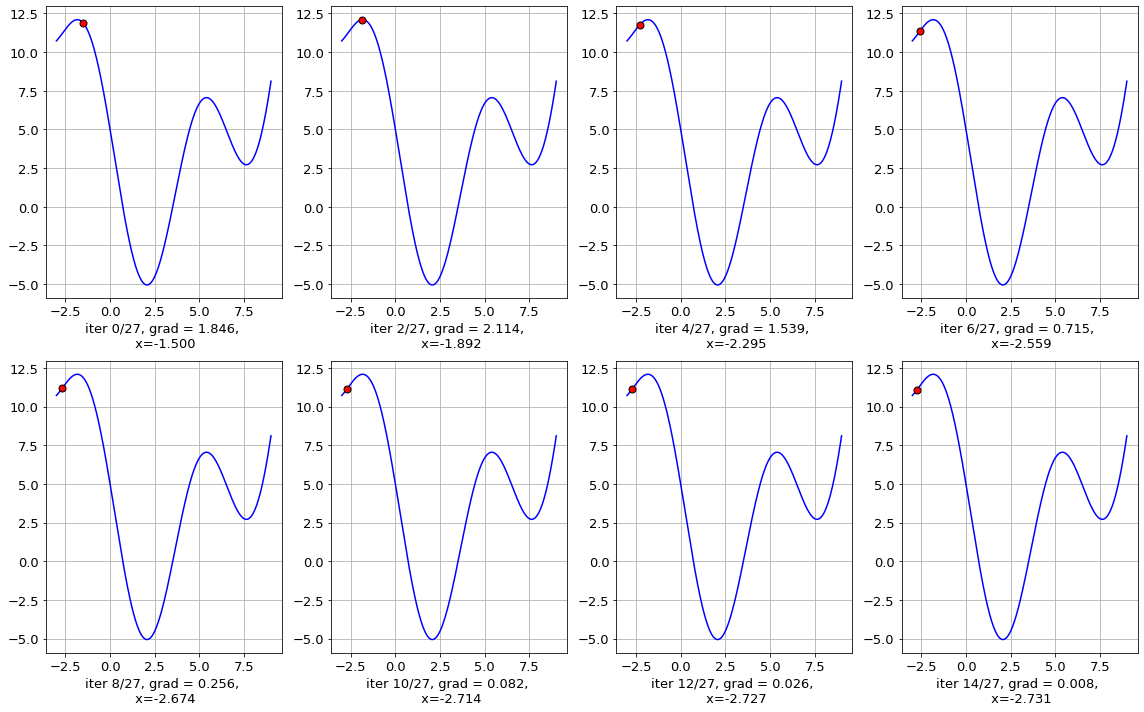

In [4]:
from matplotlib.backends.backend_pdf import PdfPages


def draw_gd1d(x1, ids, filename, nrows = 2, ncols = 4, start = -3, savefig = True):
    x0 = np.linspace(start, 9, 1000)
    y0 = f_function(x0)
    width = 4*ncols
    height = 5*nrows 

    fig,axs=plt.subplots(nrows,ncols,figsize=(width,height), tight_layout=True) 
    # with PdfPages(filename) as pdf: 
    for i, k in enumerate(ids):
        r = i//ncols 
        c = i%ncols 
        
        x = x1[ids[i]]
        y = f_function(x)
        str0 = 'iter {}/{}, grad = {:.3f}, \n x={:.3f}'.format(ids[i], len(x1)-1, grad(x), x)        

        if nrows > 1:
            axs[r, c].plot(x0, y0, 'b')
            axs[r, c].set_xlabel(str0, fontsize = 13)
            axs[r, c].plot(x, y, 'ro', markersize=7, markeredgecolor = 'k')
            axs[r, c].plot()
            axs[r, c].tick_params(axis='both', which='major', labelsize=13)
            axs[r, c].grid()

            # # Save just the portion _inside_ the second axis's boundaries
            # extent = axs[r, c].get_tightbbox(fig.canvas.get_renderer(), 
            #      call_axes_locator = True,  
            #      bbox_extra_artists = None).transformed(fig.dpi_scale_trans.inverted())
            # extent = axs[r, c].get_window_extend().transformed(fig.dpi_scale_trans.inverted())
            # print(extent)
            # plt.savefig('{}.png'.format(i), bbox_inches=extent)            
            # plt.savefig('{}.png'.format(i), bbox_inches='tight')
            fig.show()
        else: 
            axs[c].plot(x0, y0, 'b')
            axs[c].set_xlabel(str0, fontsize = 13)
            axs[c].plot(x, y, 'ro', markersize=7, markeredgecolor = 'k')
            axs[c].plot()
            axs[c].tick_params(axis='both', which='major', labelsize=13)
    
        #if savefig:
        #    pdf.savefig(bbox_inches='tight')
        # plt.show()


# good learning rate 
x1, it1 = gradient_descent(eta=.1, x0=-1.5)
# print (x1)
ids = [0, 2, 4, 6, 8, 10, 12, 14]
draw_gd1d(x1, ids, "toto.pdf")
# draw_gd1d_full(x1, ids, "toto.pdf")
